<a href="https://colab.research.google.com/github/canaranjo23/AA-IG-CamiloNaranjo/blob/main/TP3_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------
Shape x:  (500,)
Shape t:  (500,)
Shape p:  (500,)
-------------------------------------------

xm shape:  (10,)
xmm shape:  (50,)

Primeros 15 datos de xmm:  [0.19190324 0.19190324 0.19190324 0.19190324 0.19190324 0.70014438
 0.70014438 0.70014438 0.70014438 0.70014438 0.99393538 0.99393538
 0.99393538 0.99393538 0.99393538] 

Número de unicos valores de x:  10 

-------------------------------------------
tm shape:  (10, 5)
tmm shape:  (50,) 

t originales:  [ 4.459774e+00 -2.578854e+00 -4.747090e+00 -3.530326e+00  4.744444e-03
 -3.671662e+00 -3.580519e+00  2.540529e-01 -5.121497e+00 -1.289123e+00
  7.610360e+00  1.270783e+00  7.319286e+00  5.167076e+00  1.634240e+00] 

t tranformados:  [-4.501103 -2.021905  2.187538 -4.917785  1.568132]
-------------------------------------------

[0.19190324 0.70014438 0.99393538 1.8526582  2.4265026  3.3464048
 4.0427652  4.7127496  5.2772028  5.7314638 ]
[ 4.459774  -3.671662   7.61036   12.67661   -1.7

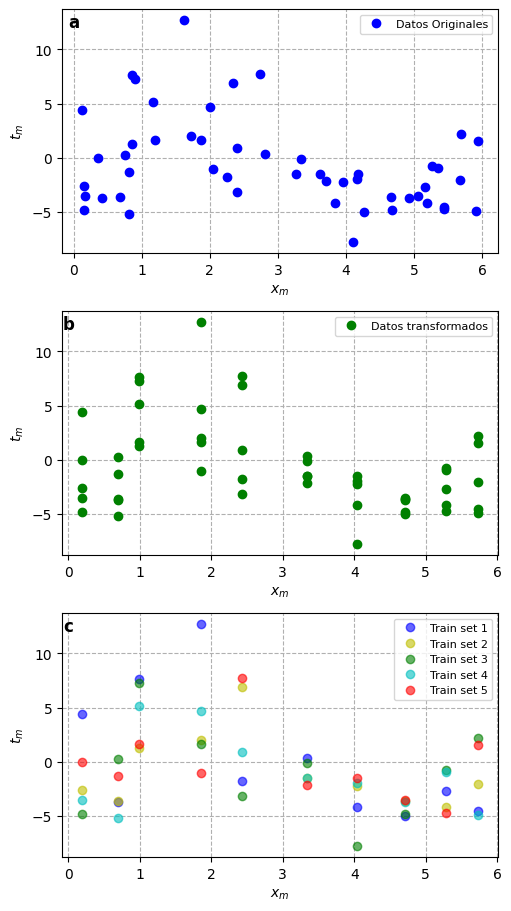

In [91]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Definimos la ruta de GitHub
path = 'https://raw.githubusercontent.com/canaranjo23/AA-IG-CamiloNaranjo/main/Data-TP3/'

# Se leen los datos
x1 = ((pd.read_csv(path+'dataset-2-training-Entradas.txt', sep=' ', header=None)).to_numpy()).flatten()    # Entradas de entrenamiento
t1 = ((pd.read_csv(path+'dataset-2-training-targets.txt', sep=' ', header=None)).to_numpy()).flatten()     # Targets de entrenamiento
p1 = ((pd.read_csv(path+'dataset-2-Entradas.txt', sep=' ', header=None)).to_numpy()).flatten()             # Entradas para predicción

print('-------------------------------------------')
print('Shape x: ', x1.shape)
print('Shape t: ', t1.shape)
print('Shape p: ', p1.shape)
print('-------------------------------------------\n')

# Organizamos los datos de menor a mayor valor. Esto se realiza con el objetivo 
# de agrupar los datos cada 5 valores, para construir el dataset que permita 
# calcular el Sesgo y la Varianza. 
ind = np.argsort(x1)        # Se extraen los indices de acuerdo a los x
xs = x1[ind]                # Se organiza el vector de x
ts = t1[ind]                # Se organiza el vector de t

# Generación del subset
lar = 50
xs = xs[0:lar]
ts = ts[0:lar]

# Plot 
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(5.0,9.0), 
                                  dpi=100, constrained_layout=True)

# Plot - De los 500 Datos originales
ax1.plot(xs, ts, 'bo', label='Datos Originales', zorder=4)
ax1.set_xlabel(r'$x_m$')
ax1.set_ylabel('$t_m$')
ax1.grid(True, linestyle='--')
ax1.legend(fontsize=8)
ax1.text(0, 12, 'a', fontsize=12, fontweight='bold', ha='center')

# Agrupamiento de los datos en x
# Se agrupan los datos del vector x cada 5 posiciones del vector. Por lo tanto,
# tendremos 100 grupos de 5 elementos. Luego cada grupo es promediado. De esta
# manera tendremos 100 valores de x, y 5 mediciones para cada valor. 
xm = np.average(xs.reshape(-1, 5), axis=1)    # Se promedian cada 5 datos. xm cuenta con 100 datos de x.
print('xm shape: ', xm.shape)

# Se reconstruye el vector x para que tenga una dimensión de 500
xmm = np.column_stack((xm,xm,xm,xm,xm)).flatten()      # xmm cuenta con 500 datos
print('xmm shape: ', xmm.shape)
print('\nPrimeros 15 datos de xmm: ',xmm[0:15],'\n')
print('Número de unicos valores de x: ', len(np.unique(xmm)),'\n')

# Se transforma el vector de t
tmm = ts*1                              # Contiene los 500 datos completos y originales de t
tm = tmm.reshape((int(lar/5),5))               # Vector transformado para cada conjunto de datos de t. Matriz con 5 columnas de 100 datos
print('-------------------------------------------')
print('tm shape: ', tm.shape)
print('tmm shape: ', tmm.shape, '\n')

# Para verificar 
print('t originales: ', tmm[0:15], '\n')
print('t tranformados: ', tm[-1,:])
print('-------------------------------------------\n')

# Se ordena p1
ind = np.argsort(p1)        # Se extraen los indices de acuerdo a los x
ps = p1[ind]                # Se organiza el vector de x

# Plot - De los 500 Datos transformados para el ejercicio
ax2.plot(xmm, tmm, 'go', label='Datos transformados', zorder=4)
ax2.set_xlabel(r'$x_m$')
ax2.set_ylabel('$t_m$')
ax2.grid(True, linestyle='--')
ax2.legend(fontsize=8)
ax2.text(0, 12, 'b', fontsize=12, fontweight='bold', ha='center')

# Plot - De los 500 Datos transformados diferenciados para cada medición
ax3.plot(xm, tm[:,0], 'bo', label='Train set 1', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,1], 'yo', label='Train set 2', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,2], 'go', label='Train set 3', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,3], 'co', label='Train set 4', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,4], 'ro', label='Train set 5', zorder=4, alpha=0.6)
ax3.set_xlabel(r'$x_m$')
ax3.set_ylabel('$t_m$')
ax3.grid(True, linestyle='--')
ax3.legend(fontsize=8)
ax3.text(0, 12, 'c', fontsize=12, fontweight='bold', ha='center')

print(xm)
print(tm[:,0])

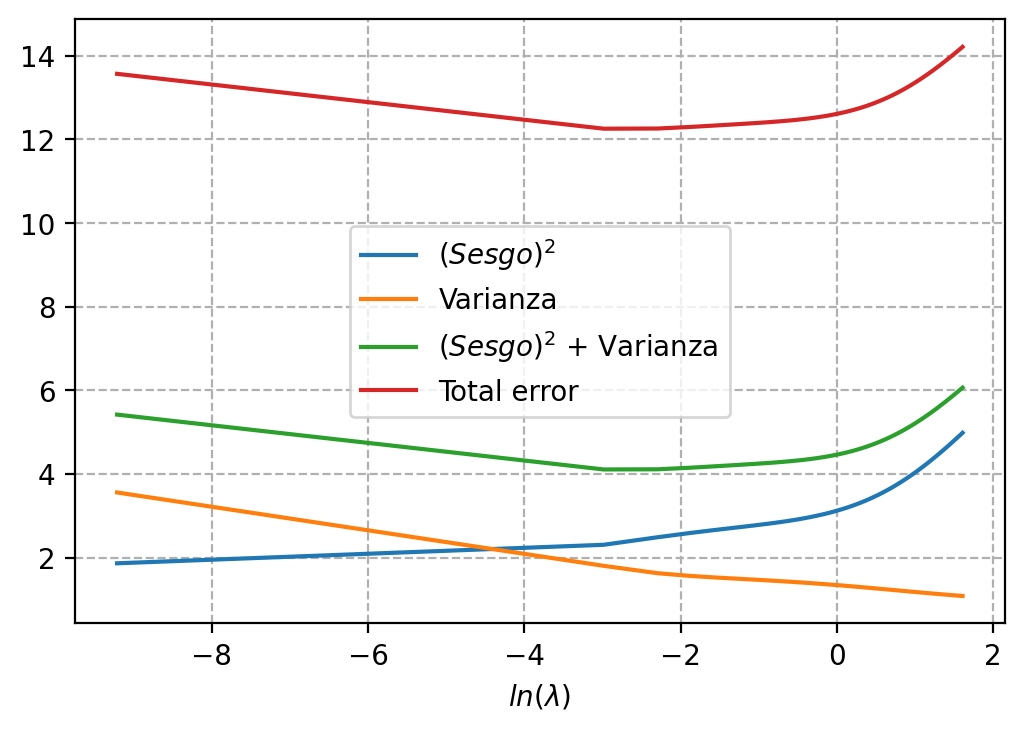

In [92]:
# Definimos el h(x) = E[t|x] 
# Para esto, tomamos el promedio de los valores de t para cada x. 
hx = np.mean(tm, axis=1)

# Definimos una función para calcular las funciones de base Gaussianas
def gaussian_basis(x, mu, s2=1):
    return np.exp(- ((mu-x)**2) / (2*s2))

# ------------------------------------------------------------------------------
#  ENTRENAMIENTO 
# ------------------------------------------------------------------------------
# --------- Función de Base: Exponencial

x_train = xm            # Asignamos los valores de x para el entranamiento
x_test = xm 

# Definimos el rango de valores de Lambda
rango = 100
rl = np.linspace(0.0001, 5.0, num=rango)
datap = np.zeros((3, rango))

for i in range(rango):
  # Realizamos el entrenamiento para los 5 Datasets que tenemos disponibles.
  D = 5 
  yxd = np.zeros_like(tm)
  for d in range(D):
    t_train = tm[:,d] 

    # Construimos la matriz phi
    M = 100   # Numero de orden de nuestro polinomio
    phi = np.ones((len(t_train), M))
    for m in range(M-1):
        mu = m/M
        phi[:, m+1] = np.vectorize(gaussian_basis)(x_train, mu)

    # Definimos el parametro de regularizacion
    lambd = rl[i]

    # Calculamos el vector de coeficiente Wml, este es nuestro W inicial. 
    Wml = np.linalg.pinv( lambd*np.identity(M) + phi.T @ phi ) @ phi.T @ t_train

    # Validación de los parametros W calculados
    p1 = x_test
    phi_ = np.ones((len(p1), M))

    # Calculamos la nueva matriz phi para los valores de validación
    for m in range(M-1):
        mu = m/M
        phi_[:, m+1] = np.vectorize(gaussian_basis)(p1, mu)
    yxd[:,d] = phi_ @ Wml

  # Calculo del (Bias)2 - Sesgo:
  Eyxd = np.mean(yxd, axis=1)      # Se calcula la media de todos los modelos realizados
  bias2 = np.mean((Eyxd - hx)**2)
  datap[0,i] = bias2

  # Calculo de la varianza:
  var = np.mean((yxd - np.column_stack((Eyxd,Eyxd,Eyxd,Eyxd,Eyxd)))**2)
  datap[1,i] = var

  # Calculo del Error intrinseco: 
  noise = np.mean((tm - np.column_stack((hx,hx,hx,hx,hx)))**2)
  datap[2,i] = noise

# Plot - Comparacion de estimados con datos iniciales
fig = plt.figure(dpi=200)

plt.plot(np.log(rl), datap[0,:], label='$(Sesgo)^2$', zorder=4)
plt.plot(np.log(rl), datap[1,:], label='Varianza', zorder=4)
plt.plot(np.log(rl), datap[0,:]+datap[1,:], label='$(Sesgo)^2$ + Varianza', zorder=4)
plt.plot(np.log(rl), datap[0,:]+datap[1,:]+datap[2,:], label='Total error', zorder=4)

plt.xlabel(r'$ln(\lambda)$')
plt.grid(True, linestyle='--')
plt.legend()

h(x) shape:  (10,) 

Wml para el Train set N°  0  es:  [-3.22981712e+00  1.03245831e+00  9.65377655e-01  8.98839390e-01
  8.32888955e-01  7.67571904e-01  7.02933877e-01  6.39020566e-01
  5.75877690e-01  5.13550966e-01  4.52086077e-01  3.91528646e-01
  3.31924207e-01  2.73318169e-01  2.15755794e-01  1.59282162e-01
  1.03942142e-01  4.97803606e-02 -3.15882585e-03 -5.48313638e-02
 -1.05193533e-01 -1.54201975e-01 -2.01813726e-01 -2.47986248e-01
 -2.92677454e-01 -3.35845746e-01 -3.77450038e-01 -4.17449789e-01
 -4.55805036e-01 -4.92476418e-01 -5.27425209e-01 -5.60613346e-01
 -5.92003458e-01 -6.21558897e-01 -6.49243763e-01 -6.75022932e-01
 -6.98862086e-01 -7.20727741e-01 -7.40587271e-01 -7.58408933e-01
 -7.74161898e-01 -7.87816275e-01 -7.99343133e-01 -8.08714526e-01
 -8.15903521e-01 -8.20884216e-01 -8.23631768e-01 -8.24122408e-01
 -8.22333471e-01 -8.18243408e-01 -8.11831814e-01 -8.03079442e-01
 -7.91968223e-01 -7.78481285e-01 -7.62602970e-01 -7.44318849e-01
 -7.23615738e-01 -7.00481715e-01 -6

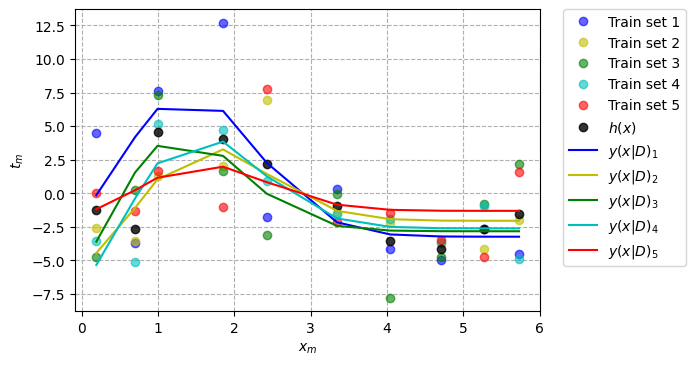

In [94]:
# Definimos el h(x) = E[t|x] 
# Para esto, tomamos el promedio de los valores de t para cada x. 
hx = np.mean(tm, axis=1)
print('h(x) shape: ', hx.shape, '\n')

# Definimos una función para calcular las funciones de base Gaussianas
def gaussian_basis(x, mu, s2=1):
    return np.exp(- ((mu-x)**2) / (2*s2))

#def gaussian_basis(x, mu, gamma=1):
#   return np.exp(-gamma * np.linalg.norm(mu-x)**2)

# ------------------------------------------------------------------------------
#  ENTRENAMIENTO 
# ------------------------------------------------------------------------------
# --------- Función de Base: Exponencial

x_train = xm            # Asignamos los valores de x para el entranamiento
x_test = xm 

# Realizamos el entrenamiento para los 5 Datasets que tenemos disponibles.
D = 5 
yxd = np.zeros_like(tm)
for d in range(D):
  t_train = tm[:,d] 

  # Construimos la matriz phi
  M = 100   # Numero de orden de nuestro polinomio
  phi = np.ones((len(t_train), M))
  for m in range(M-1):
      mu = m/M
      phi[:, m+1] = np.vectorize(gaussian_basis)(x_train, mu)

  # Definimos el parametro de regularizacion
  lambd = 0.14

  # Calculamos el vector de coeficiente Wml, este es nuestro W inicial. 
  Wml = np.linalg.pinv( lambd*np.identity(M) + phi.T @ phi ) @ phi.T @ t_train
  print('Wml para el Train set N° ',d,' es: ', Wml)

  # Validación de los parametros W calculados
  p1 = x_test
  phi_ = np.ones((len(p1), M))

  # Calculamos la nueva matriz phi para los valores de validación
  for m in range(M-1):
      mu = m/M
      phi_[:, m+1] = np.vectorize(gaussian_basis)(p1, mu)
  yxd[:,d] = phi_ @ Wml

# Plot - Comparacion de estimados con datos iniciales
fig = plt.figure(dpi=100)

plt.plot(x_train, tm[:,0], 'bo', label='Train set 1', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,1], 'yo', label='Train set 2', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,2], 'go', label='Train set 3', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,3], 'co', label='Train set 4', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,4], 'ro', label='Train set 5', zorder=4, alpha=0.6)

plt.plot(x_train, hx, 'ko', label=r'$h(x)$', zorder=4, alpha=0.8)

plt.plot(x_test, yxd[:,0], 'b', label=r'$y(x|D)_1$', zorder=4)
plt.plot(x_test, yxd[:,1], 'y', label=r'$y(x|D)_2$', zorder=4)
plt.plot(x_test, yxd[:,2], 'g', label=r'$y(x|D)_3$', zorder=4)
plt.plot(x_test, yxd[:,3], 'c', label=r'$y(x|D)_4$', zorder=4)
plt.plot(x_test, yxd[:,4], 'r', label=r'$y(x|D)_5$', zorder=4)

plt.xlabel(r'$x_m$')
plt.ylabel(r'$t_m$')
plt.grid(True, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

print('\ny(x|D) shape: ', yxd.shape, '\n')
print('-------------------------------------------\n')

# Calculo del (Bias)2 - Sesgo:
Eyxd = np.mean(yxd, axis=1)      # Se calcula la media de todos los modelos realizados
bias2 = np.mean((Eyxd - hx)**2)
print('(bias)^2 =', bias2)

# Calculo de la varianza:
var = np.mean((yxd - np.column_stack((Eyxd,Eyxd,Eyxd,Eyxd,Eyxd)))**2)
print('Variance =', var)

# Calculo del Error intrinseco: 
noise = np.mean((tm - np.column_stack((hx,hx,hx,hx,hx)))**2)
print('noise =', noise, '\n')


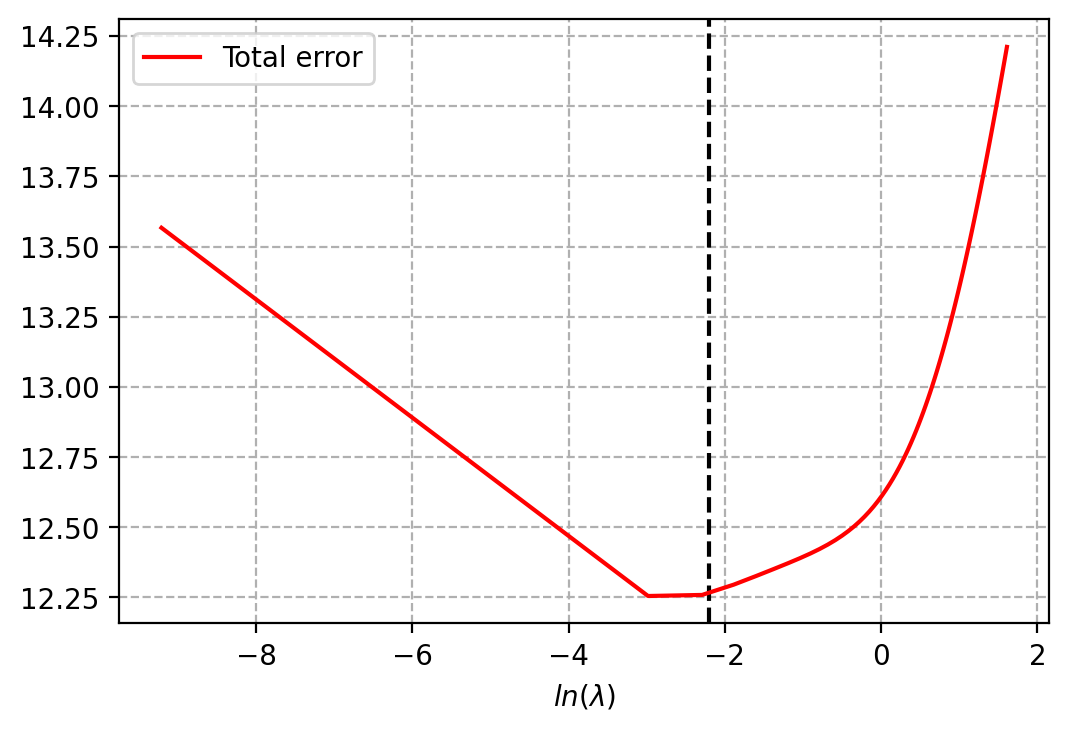

In [95]:
fig = plt.figure(dpi=200)

plt.plot(np.log(rl), datap[0,:]+datap[1,:]+datap[2,:], 'r', label='Total error', zorder=4)
plt.axvline(x=-2.2, c='k', ls='--')
plt.xlabel(r'$ln(\lambda)$')
plt.grid(True, linestyle='--')
plt.legend(fontsize=10)

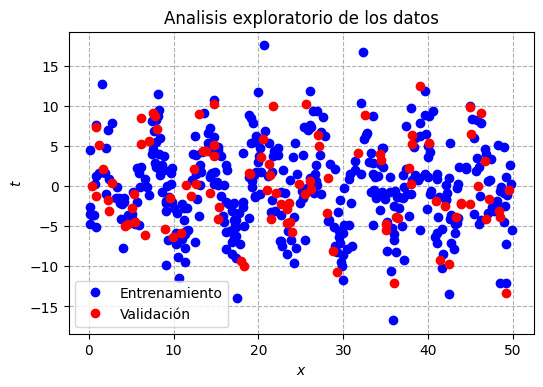

In [ ]:
# Separamos nuestro dataset: + 400 para ajustar nuestro modelo, + 100 para validar el modelo
# Train --> Ajuste;  Test --> Validacion
x_train, x_test, t_train, t_test = train_test_split(x1, t1, train_size=400, random_state=21)

# Plot - Datos de entrenamiento y de validación
fig = plt.figure(dpi=100)
plt.plot(x_train, t_train, 'bo', label='Entrenamiento', zorder=4)
plt.plot(x_test, t_test, 'ro', label='Validación', zorder=4)
plt.title('Analisis exploratorio de los datos')
plt.xlabel(r'$x$')
plt.ylabel('$t$')
plt.grid(True, linestyle='--')
plt.legend()

(50, 8)
Wml: 
 [  -2.64248836  559.19140669 -574.23718779 -391.87738547  174.59578519
  353.21498762  -28.94688399  -77.35075168]


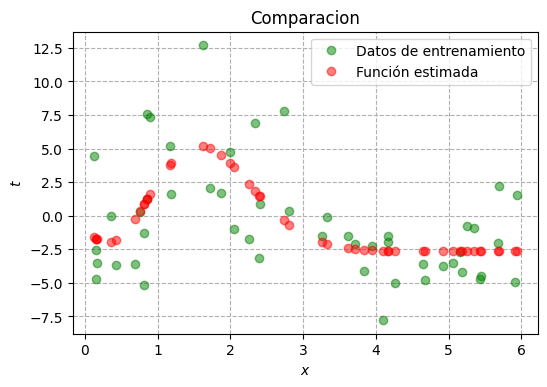

In [ ]:
# ------------------------------------------------------------------------------
#  ENTRENAMIENTO 
# ------------------------------------------------------------------------------
# --------- Función de Base: Gaussiana

x_train = xp
t_train = tp
x_test = xp

def gaussian_basis(x, mu, s2=1):
    return np.exp(- ((mu-x)**2) / (2*s2))

# Construimos la matriz phi
M = 8   # Numero de orden de nuestro polinomio
phi = np.ones((len(t_train), M))
for m in range(M-1):
    mu = m/M
    phi[:, m+1] = np.vectorize(gaussian_basis)(x_train, mu)

print(phi.shape)

# Definimos el parametro de regularizacion
lambd = 0.000001

# Calculamos el vector de coeficiente Wml, este es nuestro W inicial. 
Wml = np.linalg.pinv( lambd*np.identity(M) + phi.T @ phi ) @ phi.T @ t_train
print('Wml: \n', Wml)

# Validación de los parametros W calculados
p1 = x_test
phi_ = np.ones((len(p1), M))

# Calculamos la nueva matriz phi para los valores de validación
for m in range(M-1):
    mu = m/M
    phi_[:, m+1] = np.vectorize(gaussian_basis)(p1, mu)
t_ = phi_ @ Wml

# Plot - Comparacion de estimados con datos iniciales
fig = plt.figure(dpi=100)
plt.plot(x_train, t_train, 'go', label='Datos de entrenamiento', zorder=4, alpha=0.5)
#plt.plot(x_test, t_test, 'bo', label='Datos de validación', zorder=4, alpha=0.5)
plt.plot(p1, t_, 'ro', label='Función estimada', zorder=4, alpha=0.5)
plt.title('Comparacion')
plt.xlabel(r'$x$')
plt.ylabel('$t$')
plt.grid(True, linestyle='--')
plt.legend()

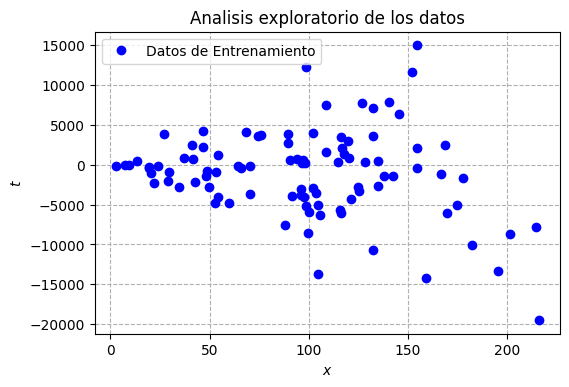

In [ ]:
# ------------------------------------------------------------------------------
#  VALIDACION 
# ------------------------------------------------------------------------------

# Construimos la matriz phi para los datos de validación
phit = np.ones((len(x_test),M))
for i in range(0,M):
  phit[:,i] = x_test**i

# Se calculan los tn con el Wml obtenido
tn = phit @ Wml

# Plot de comparacion 
fig = plt.figure(dpi=100)
plt.plot(x_test, t_test, 'bo', label='Datos de Entrenamiento', zorder=4)
#plt.plot(x_test, tn, 'ro', label='Estimados', zorder=4)
plt.title('Analisis exploratorio de los datos')
plt.xlabel(r'$x$')
plt.ylabel('$t$')
plt.grid(True, linestyle='--')
plt.legend()

0.0025
0.36787944117144233
